# Daniele Mellino -2013373

In [1]:
library(latex2exp)
library(tidyverse)
library(purrr)
library(dplyr)
library(lubridate)
library(ggplot2)
suppressWarnings(require(RColorBrewer))
library(viridis)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date

Loading required package: RColorBrewer
Loading required package: viridisLite


# Exercise 1
The triangular distribution, in the interval (a,b) , is given by the following: 

$$
f(x) =
  \begin{cases} \frac{2(x-a)}{(b-a)(c-a)}, & a <= x <= c
             \\ \frac{2(b-x)}{(b-a)(b-c)}, & c <= x <= b
             \\ 0, & otherwise
  \end{cases}
$$

where c stays in [a,b]

Since the distribution is already normalized I define it on R:

In [2]:
#define triangular distribution

dtriangular <- function (x, a=0, b=2, c=1.0) {
                            if(c<a |c>b) return(warning(" Caution c is out of bound "))#send warning for wrong c
                            res <- ifelse(x>=a & x<=b,
                                    ifelse(
                                        x<c,
                                        2*(x-a) / ((b-a)*(c-a)),
                                        2*(b-x) / ((b-a)*(b-c))
                                    ),
                                          0.)
                               
    return(res)
}


### 1.  plot the function, given the interval (a,b)

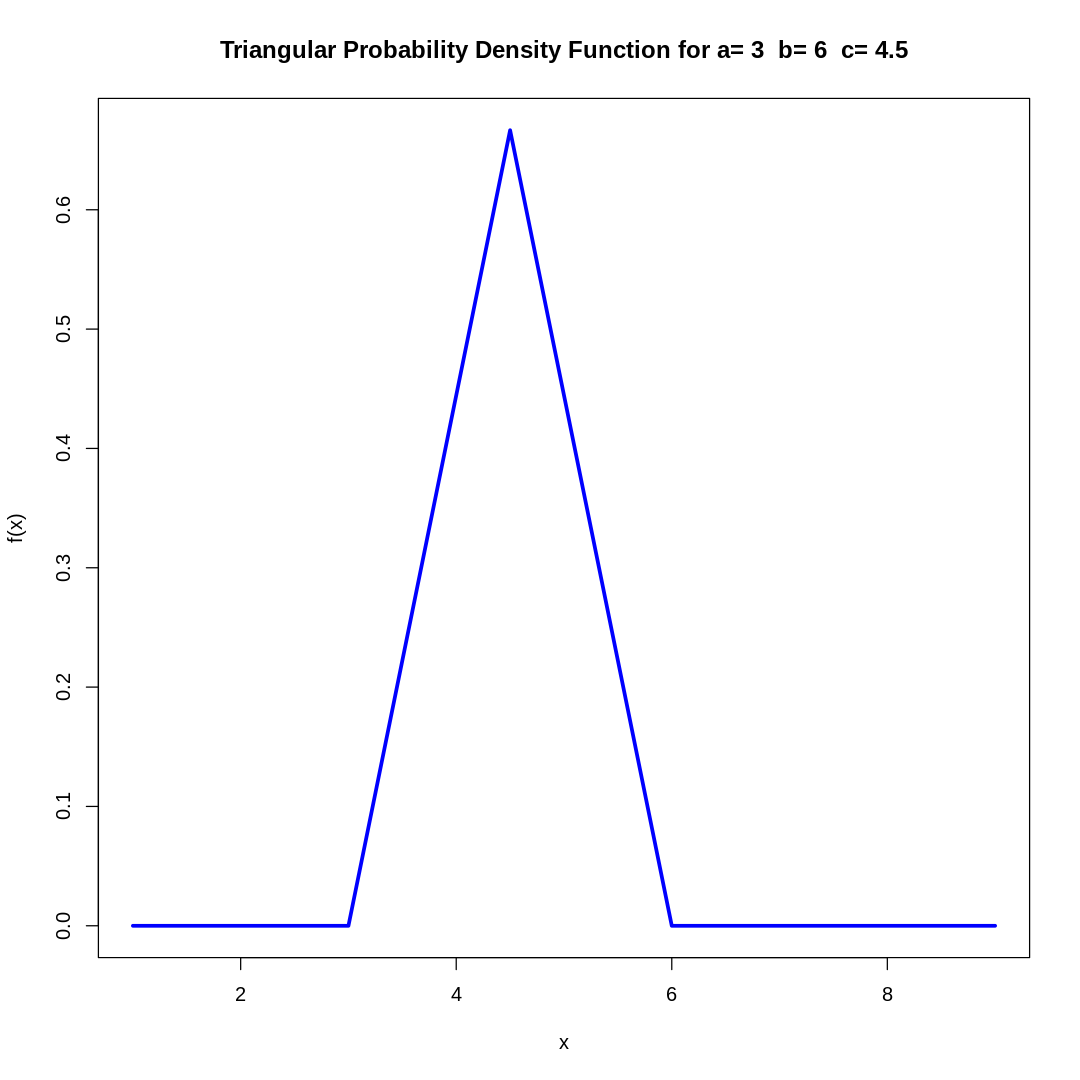

In [3]:
options(repr.plot.width=9, repr.plot.height=9)

a=3
b=6
c=4.5

#choose x and y
x <- seq(a-2,b+3,0.01)
dtata <- dtriangular(x, a,b,c)

#plot
plot(x, dtata,
     xlab='x', 
     ylab='f(x)',
     main=paste('Triangular Probability Density Function for a=',a," b=", b, " c=",c),
     type='l', 
     col='blue',
     lwd=3)

### 2.  write an algorithm to generate random numbers from the triangular distribution

The basic method is to write down the cumulative function(CDF), invert it, and give it as input an uniform random sample between 0 and 1.

The CDF is :

$$
F(x) =
  \begin{cases} \frac{(x-a)^2}{(b-a)(c-a)}, & a <= x <= c
             \\ 1-\frac{(x-b)^2}{(b-a)(b-c)}, & c <= x <= b
             \\ 0, \;   x<a
             \\ 1, \; otherwise
  \end{cases}
$$

The inverse, so the quantile function is:

$$
F^{-1}(q) =
  \begin{cases} a+\sqrt{(b-a)(c-a)q}, & 0 <= q <= \frac{c-a}{b-a}
             \\ b-\sqrt{(b-a)(b-c)(1-q)}, & \frac{c-a}{b-a} <= q<=1        
  \end{cases}
$$


In [4]:
#define the usual set of functions:

ptriangular <- function(x, a=0, b=2, c=1) {
    F   <- ifelse(x>=a & x<=b,
                  ifelse(x<c,
                         (x-a)^2/((b-a)*(c-a)),
                         1.-(x-b)^2/((b-a)*(b-c)) ),
                  ifelse(x<a,0,1)
                        )
                 
    return(F)
}

qtriangular<- function(q,a=0,b=2,c=1){
    Q<-ifelse(q<0 | q>1, NA,
               ifelse(q< (c-a)/(b-a), 
                      a+ sqrt((b-a)*(c-a)*q), 
                      b- sqrt((b-a)*(b-c)*(1-q)) ))
    return (Q)
}


rtriangular<- function (n, a=0, b=2, c=1){
    return(qtriangular(runif(n), a,b,c))
    }

### 3. Generate $10^4$ random number from the distribution, show them in an histogram and super impose the analytical curve

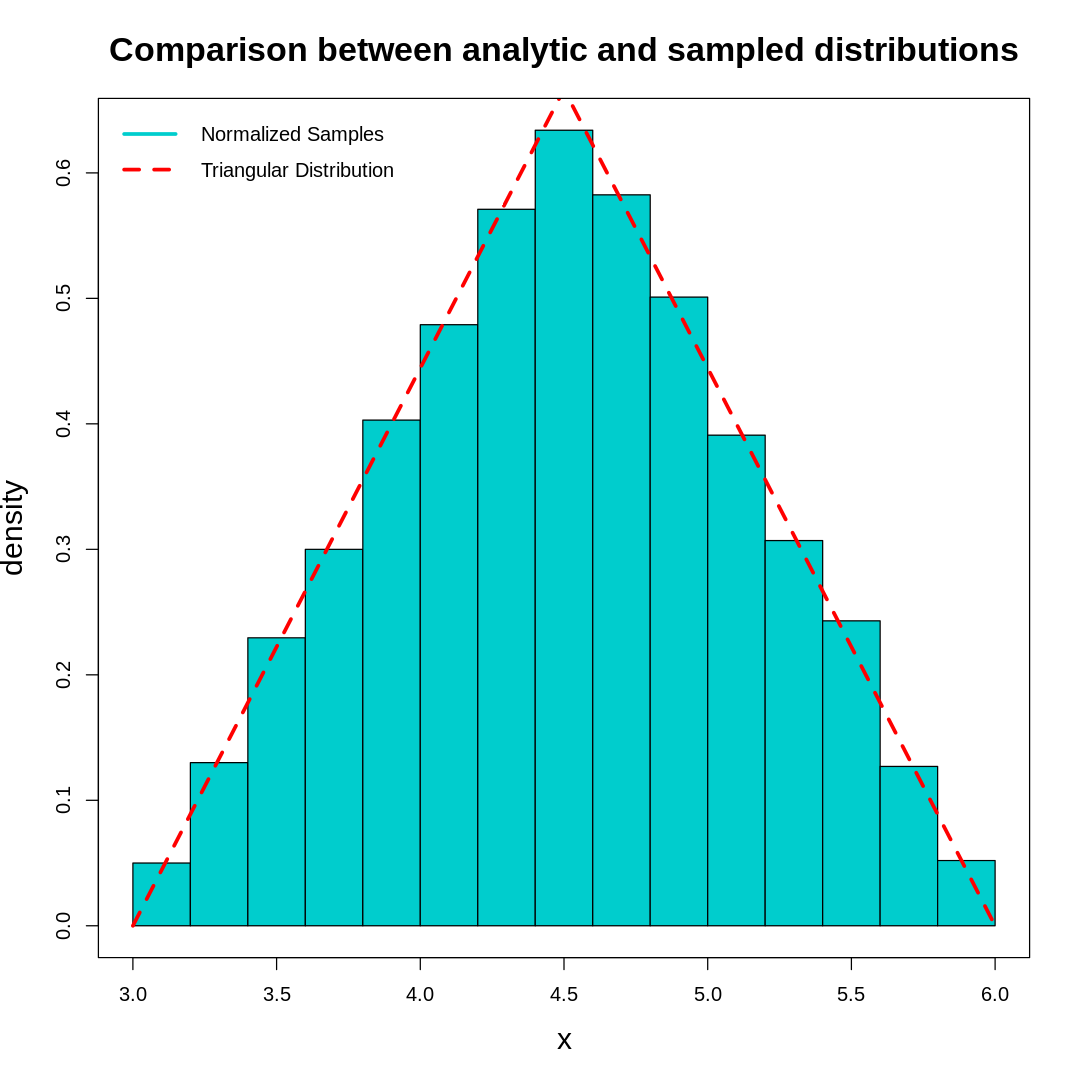

In [5]:
#generation
n <- 10000
data_r <- rtriangular(n, a=a, b=b, c=c)

options(repr.plot.width=9, repr.plot.height=9)

## histogram
hist (data_r, 
      col='cyan3', 
      xlab='x', 
      ylab='density', 
      main='Comparison between analytic and sampled distributions',
      cex.main=1.7,
      cex.lab=1.5,
      prob=TRUE)
##curve
curve(dtriangular(x,a=a,b=b,c=c), 
      col='red',
      lt=2,
      type='l', 
      lwd=3,
      add=TRUE)

legend("topleft",
       legend=c("Normalized Samples","Triangular Distribution"),
       col=c("cyan3", "red"), 
       lty=1:2, 
       cex=1,
       box.lty=0,
       lwd=3)
box()


# Exercise 2 - Markov’s inequality

* Markov’s inequality represents an upper bound to probability distributions:

$$
P(X \geq k) \leq \frac{E[X]}{k}  \; \; \;  \text{ for } \;  k>0
$$

* having defined a function

$$ 
G(k) = 1-F(k) \equiv  P(X \geq k)
$$

plot G(k) and the Markov’s upper bound for: 
#### 1. The exponential, Exp($\lambda$=1), distribution function

The expectation value of the exponential distribution is, with this choice of $\lambda$: 

$$
E[X] =\frac{1}{\lambda} = 1
$$

Therefore:

In [6]:
# build a function that plot G(k) and the Markov's upper bound
#given k, E[x] over k, the result of the function and the title

plotMUP<-function(k,Eok,fun,title){
    options(repr.plot.width=7, repr.plot.height=7) #plot size

    ##plot
    plt<-plot(k, Eok,type='l',
         lwd=3,
         col='red',
         xlab='k',
         ylab='',
         main=title,
         cex.main=1.1,
         cex.lab=1.5,
         lty=2,
         ylim=c(0,1))

    lines(k,1-fun,
          lwd=3,
          col='navy',
          type='l')

    legend("topright",inset=0.0,
          legend=c(expression(P(X>=k)),"Markov's upper bound E[X]/k"),
          col=c("navy","red"),
          lty=1:2,
          lwd=3,
          box.lty=0,
          cex=1.4

          )

    box()
    
        }

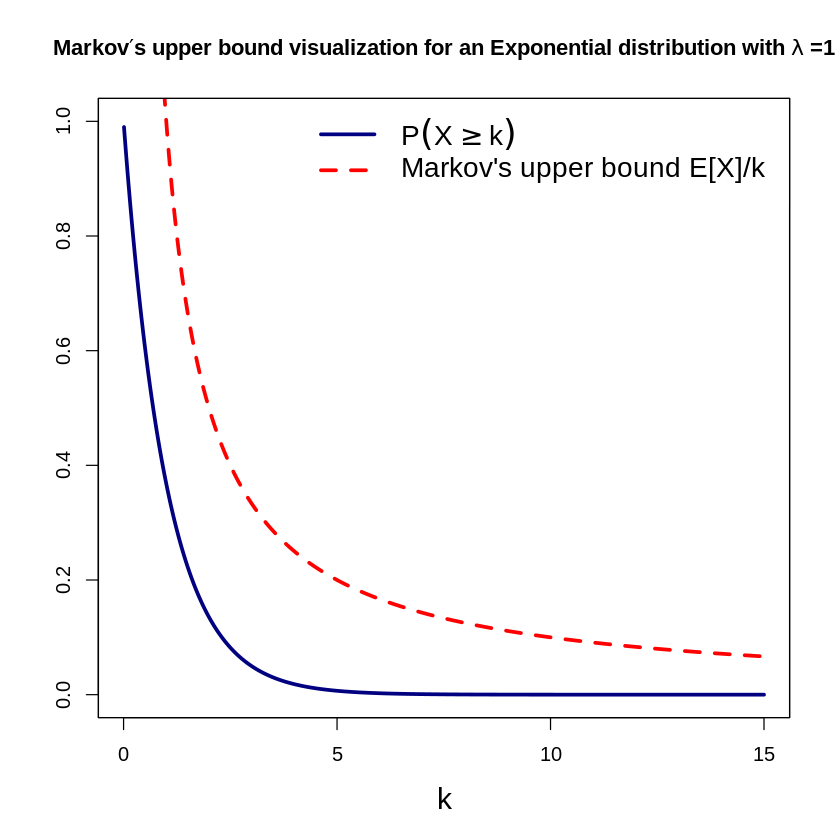

In [7]:
lambda<-1.
mean<-1./lambda

k<- seq(0.01, 15, 0.01)
Eok<- mean/k #E[X] over k
title<-TeX("\\textbf{Markov's upper bound visualization for an Exponential distribution with $\\lambda$ =1}")
fun<-pexp(k,rate=1)

plotMUP(k,Eok,fun,title)


#### 2. The uniform, $\mathcal{U}(3,5)$ , distribution function
The expectation value of the uniform distribution is, with this choice of parameters: 

$$
E[X] =\frac{b+a}{2} = 4
$$

Therefore:

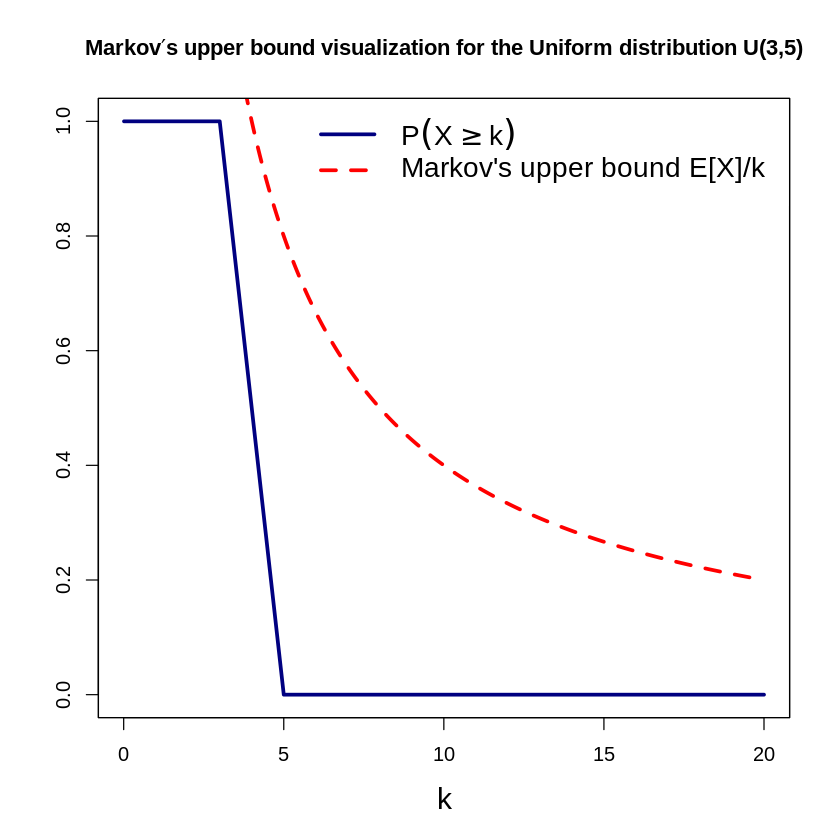

In [8]:

A<-3.
B<-5.
mean<-(B+A)/2.

k<- seq(0.01, 20, 0.01)
Eok<- mean/k #E[X] over k

title<-TeX("\\textbf{Markov's upper bound visualization for the Uniform distribution $U(3,5)$}")
fun<-punif(k,min=A,max=B)

plotMUP(k,Eok,fun,title)

#### The binomial, Bin(n= 1,p= 1/2), distribution function
The expectation value of the binomial distribution is, with this choice of parameters: 

$$
E[X] =n\,p = \frac{1}{2}
$$

Therefore:

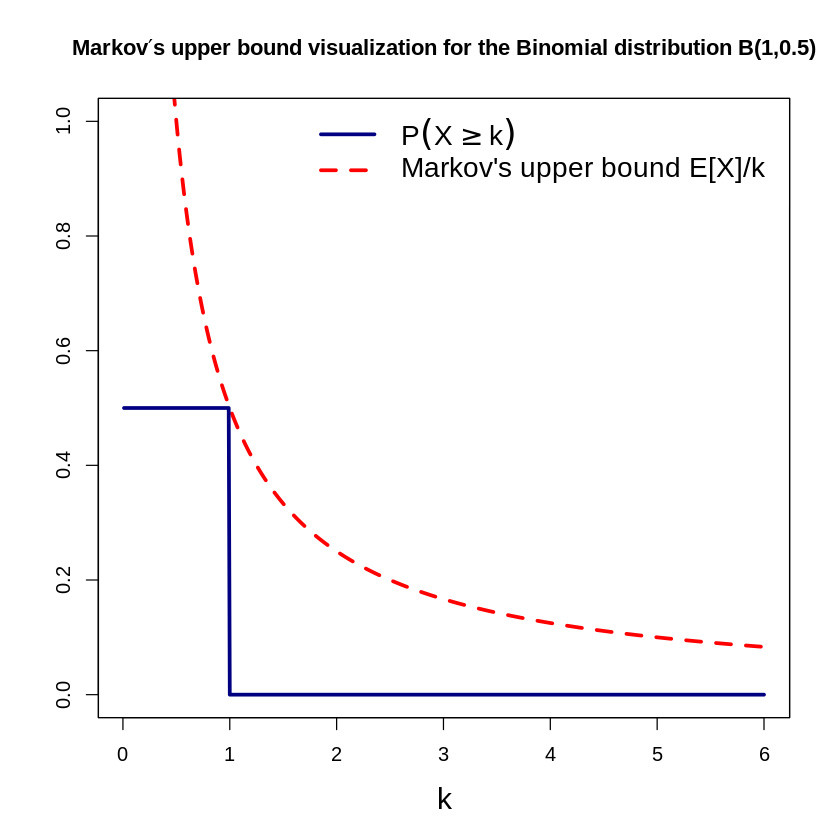

In [9]:
n<-1.
p<-0.5
mean<-n*p

k<- seq(0.01, 6, 0.01)
Eok<- mean/k #E[X] over k

title<-TeX("\\textbf{Markov's upper bound visualization for the Binomial distribution $B(1,0.5)$}")
fun<-pbinom(k,n,p)

plotMUP(k,Eok,fun,title)

### A Poisson, Pois(λ= 1/2), distribution function
The expectation value of the poisson distribution is, with this choice of parameters: 

$$
E[X] =\lambda = \frac{1}{2}
$$

Therefore:


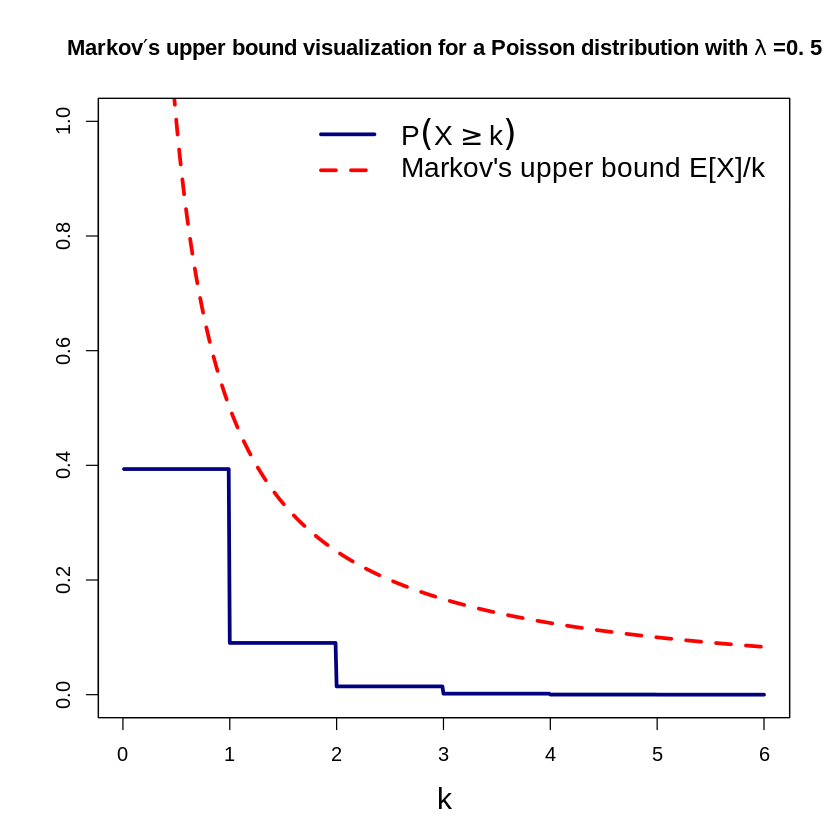

In [10]:
lambda<-0.5
mean<-lambda

k<- seq(0.01, 6, 0.01)
Eok<- mean/k #E[X] over k

title<-TeX("\\textbf{Markov's upper bound visualization for a Poisson distribution with $\\lambda$ =0.5}")
fun<-ppois(k,lambda)

plotMUP(k,Eok,fun,title)

# Exercise 3- Chebyshev's inequality
* Chebyshev’s inequality tell us that

$$
P(|X-\mu| \geq k\, \sigma)  \; \leq \frac{1}{k^2}
$$

* which can also be written as

$$ 
P(|X-\mu| < k\, \sigma)  \; \geq 1-\frac{1}{k^2}
$$

* use  R  to  show,  with  a  plot,  that  Chebyshev’s  inequality  is  an  upper  bound  to  the following distributions.

Before start let's note that:

$$
P(|X-\mu|< k\sigma)=P(\mu-k\sigma<X<\mu+k\sigma)=P(X<\mu+k\sigma)-P(X<\mu-k\sigma) \equiv \Delta P(\mu,\sigma,k)
$$

I can easily evaluate the last term using the Cumulative Density Function and plot it in order to see if it's bigger than $T(k) \equiv 1-\frac{1}{k^2}$

#### 1. A normal distribution, N(μ= 3,σ= 5)

In [11]:
# define a function that 

plotCI<- function(k,DP,title){
    
    options(repr.plot.width=8, repr.plot.height=8) #plot size

    T<-1-1./k^2

    ##plot
    plot(k, T,type='l',
         lwd=3,
         col='red',
         xlab='k',
         ylab='',
         main=title,
         cex.main=1.2,
         cex.lab=1.5,
         ylim=c(0,1),
         lty=2
        )

    lines(k,DP,
          lwd=3,
          col='navy',
          type='l'
         )

    textD<-TeX("$\\Delta P(\\mu,\\sigma,k)$")
    legend("bottomright",inset=0.0,
          legend=c(textD,"T(k)"),
          col=c("navy","red"),
          lty=1:2,lwd=3,
          box.lty=0,
          cex=1.4

          )
    box()

}

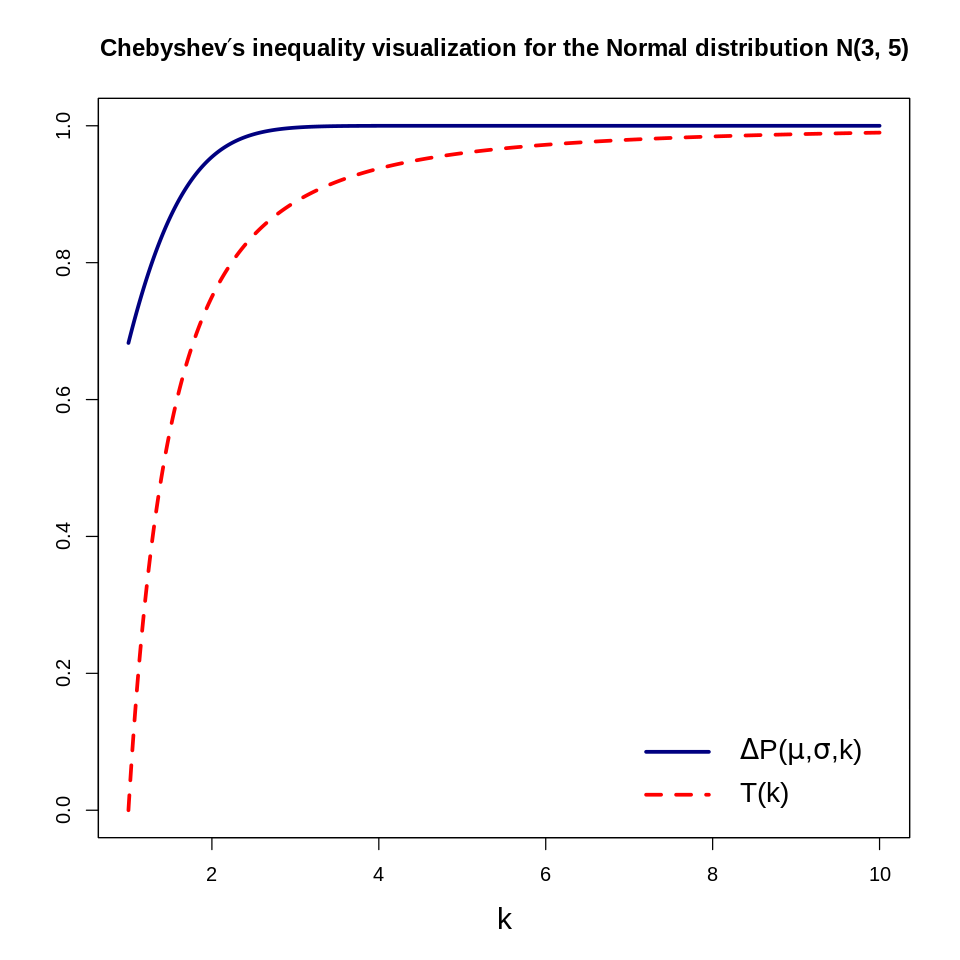

In [12]:
mu<-3
sigma<-5
k<-seq(1,10,0.005)
DeltaP<- pnorm(mu+ k*sigma,mean=mu,sd=sigma)-pnorm(mu-k*sigma,mean=mu,sd=sigma)
title<-TeX("\\textbf{Chebyshev's inequality visualization for the Normal distribution N(3,5)}")

plotCI(k,DeltaP,title)

#### An exponential distribution, Exp(λ= 1)

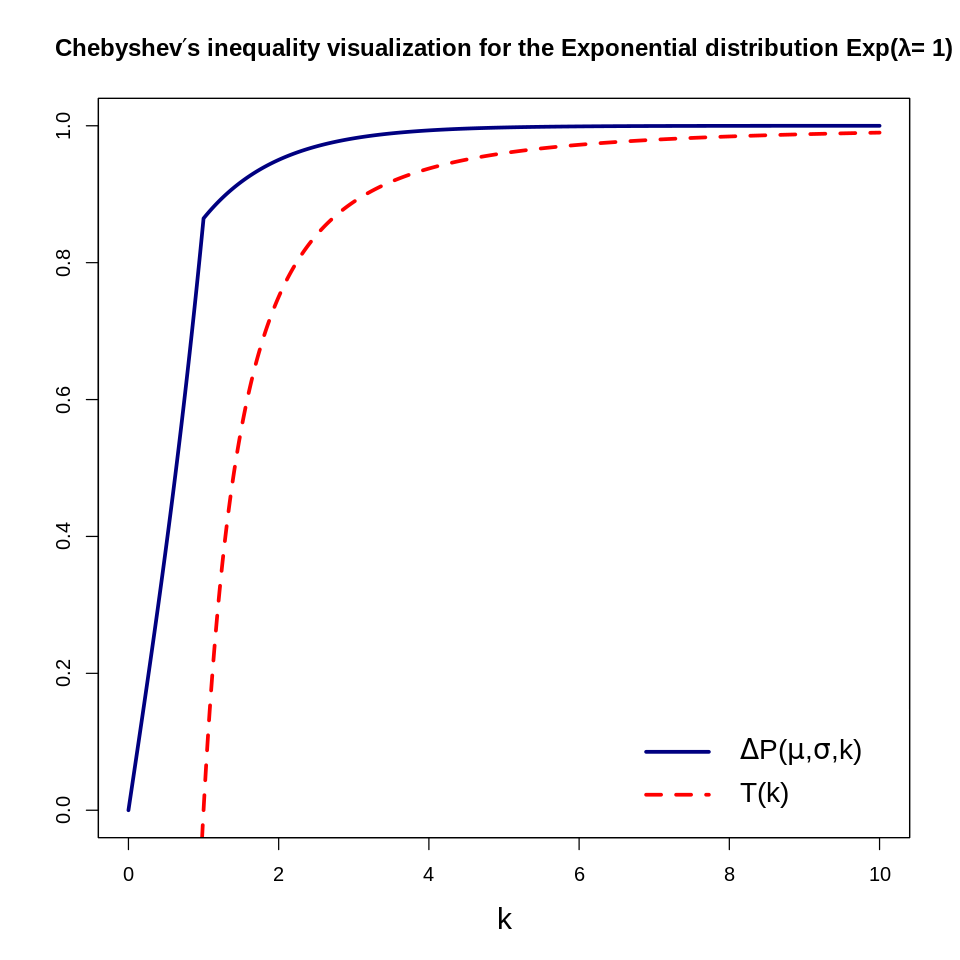

In [13]:
lambda<-1
mu<-1./lambda
sigma<-1./lambda
k<-seq(0,10,0.005)
DeltaP<- pexp(mu+ k*sigma,rate=lambda)-pexp(mu-k*sigma,rate=lambda)
title=TeX("\\textbf{Chebyshev's inequality visualization for the Exponential distribution Exp(λ= 1)}")

plotCI(k,DeltaP,title)

#### A uniform distribution U(1−√2, 1 +√2)

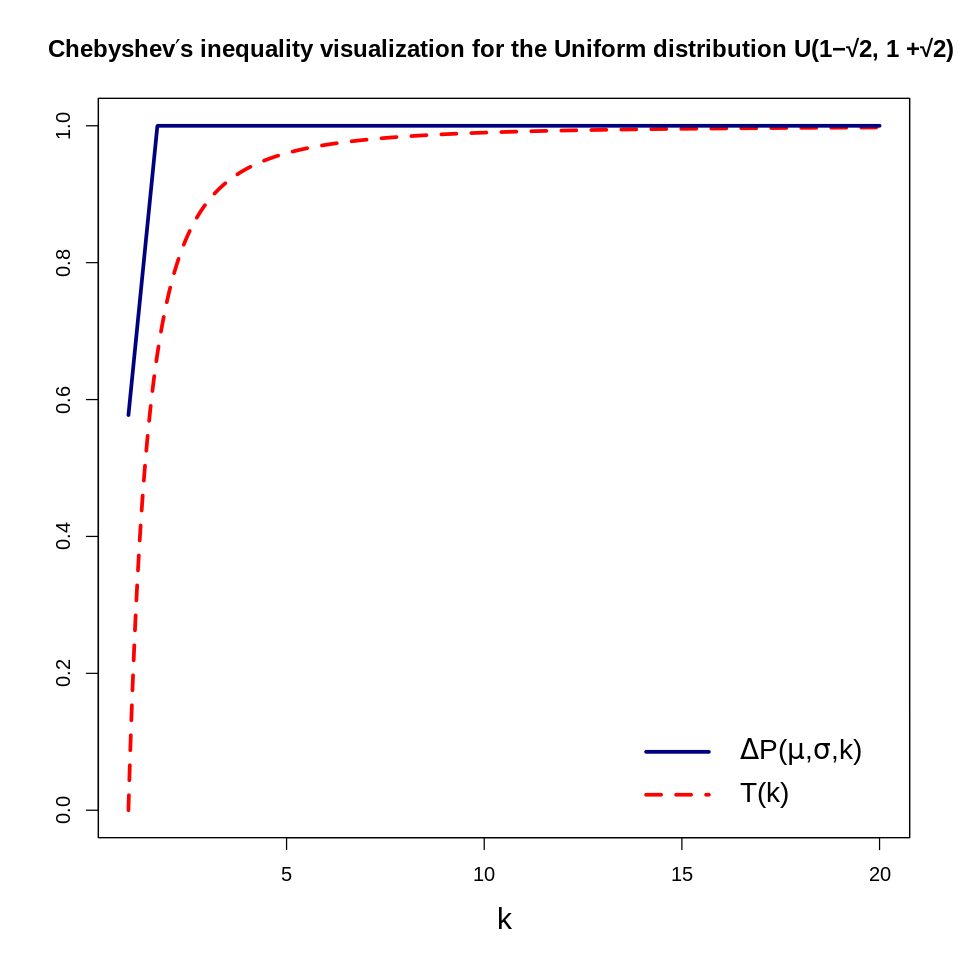

In [14]:
A<-1-sqrt(2)
B<-1+sqrt(2)

mu<-(A+B)/2
sigma<-(B-A)/sqrt(12)

k<-seq(1,20,0.01)
DeltaP<- punif(mu+ k*sigma,min=A,max=B)-punif(mu-k*sigma,min=A,max=B)

title=TeX("\\textbf{Chebyshev's inequality visualization for the Uniform distribution U(1−√2, 1 +√2) }")

plotCI(k,DeltaP,title)

#### A Poisson, Pois(λ= 1/3), distribution function

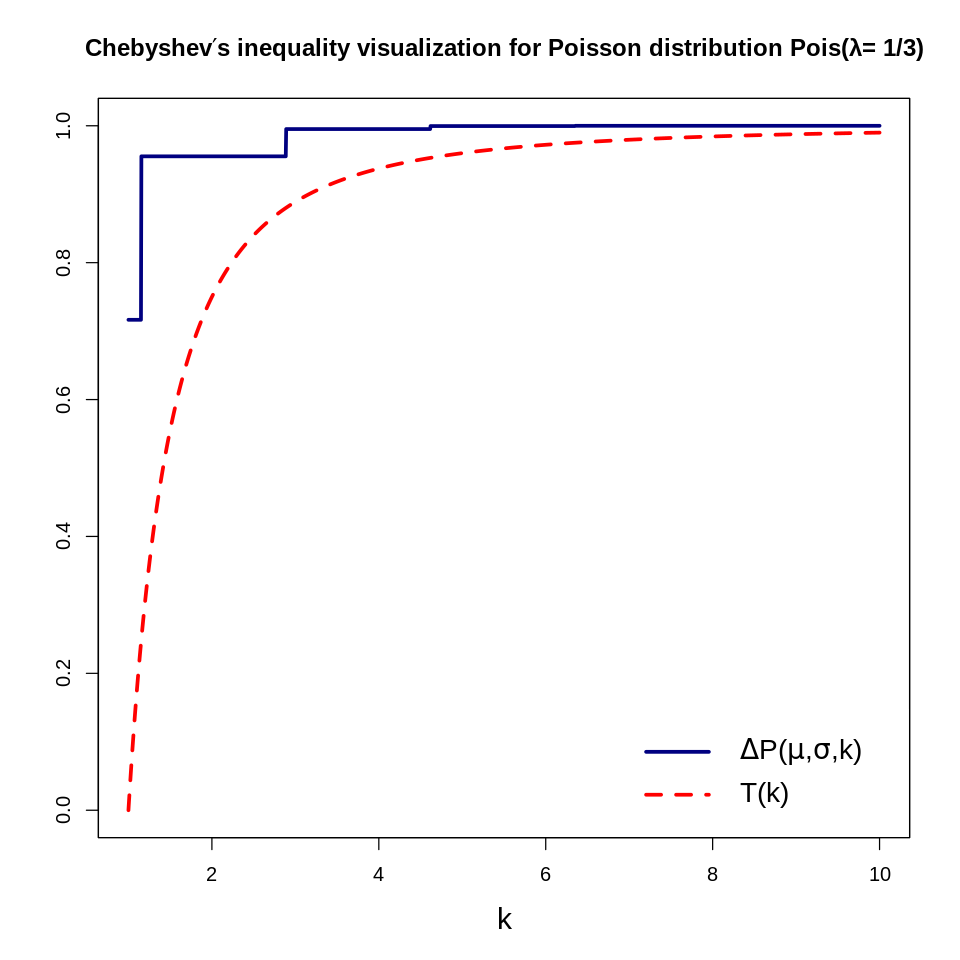

In [15]:
lambda<-1./3.
mu<-lambda
sigma<- sqrt(lambda)

k<-seq(1,10,0.005)
DeltaP<- ppois(mu+ k*sigma,lambda=lambda)-ppois(mu-k*sigma,lambda=lambda)


title=TeX("\\textbf{Chebyshev's inequality visualization for Poisson distribution  Pois(λ= 1/3)}")
plotCI(k,DeltaP,title)

# Exercise 4 - Community Mobility Open Data
* Community Mobility Reports have been created with the aim to provide insights into whathas changed in response to policies aimed at combating COVID-19. Data can be found athttps://www.google.com/covid19/mobility/

* Download and analyze the following data sets:
- https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv

and

* https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip

The data show how visitors to (or time spent in) categorized places change compared tobaseline days.  A baseline day represents a normal value for that day of the week.  Thebaseline day is the median value from the 5-week period Jan 3 – Feb 6, 2020.To make the reports useful, categories have been used to group some of the places withsimilar characteristics for purposes of social distancing guidance.  The following categoriesare available:
- retail and recreation,  i.e. places like restaurants,cafes, shopping centers, theme parks,museums,libraries, and movie theaters
- grocery and pharmacy, i.e.  grocery markets, food warehouses, farmers markets, specialtyfood shops, drug stores, and pharmacies
- parks , i.e.  national parks, public beaches, marinas, dog parks, plazas,and public gardens

- transitstations i.e.  all public transport hubs such as subway, bus, and train stations
- workplaces, i.e.  places of work
- residential, i.e.  people’s residence



Select a couple of European countries of your choice and analyze the trends in the previous variables over time:

- produce a plot of the data by averaging the observable over a period of one week (hint: convert the data field to lubridate::week) and one month and quantify the impact of COVID-19 restrictions on mobility situations

In [16]:
#download and load data
read_my_csv  <- function(year , country) {
    temp <- tempfile()
    url<-"https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip"
    filename  <- paste0(year , "_", country ,"_Region_Mobility_Report.csv")
    download.file(url,temp)
    message(paste("Reading from file:", filename ))
    data <- read_csv(unz(temp, filename),col_types = cols())
    unlink(temp)
    return(data)

}
years<-2020:2021
#load Italian Database
country<-"IT"
ITAdata  <- map_df(years, read_my_csv , country )

#Load Germanian database
country<-"FR"
FRAdata  <- map_df(years, read_my_csv , country )

#Load France database
country<-"DE"
GERdata  <- map_df(years, read_my_csv , country )


Reading from file: 2020_IT_Region_Mobility_Report.csv
Reading from file: 2021_IT_Region_Mobility_Report.csv
Reading from file: 2020_FR_Region_Mobility_Report.csv
Reading from file: 2021_FR_Region_Mobility_Report.csv
Reading from file: 2020_DE_Region_Mobility_Report.csv
Reading from file: 2021_DE_Region_Mobility_Report.csv


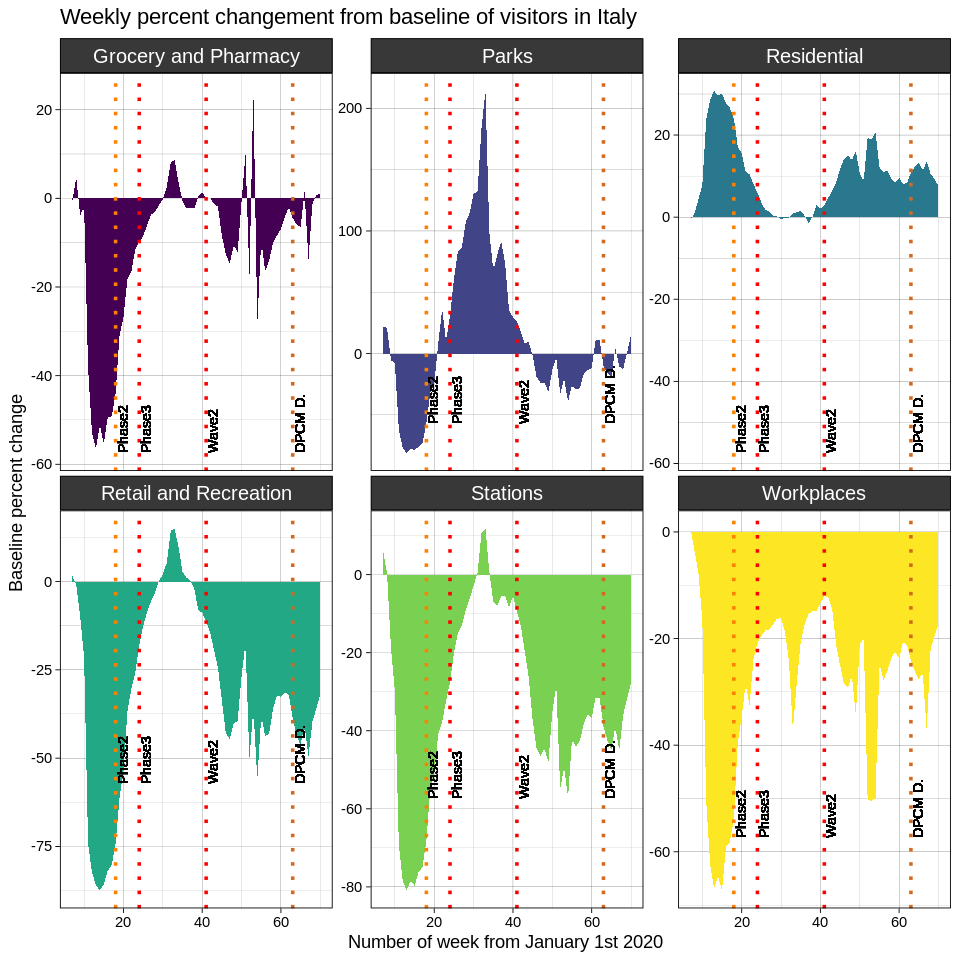

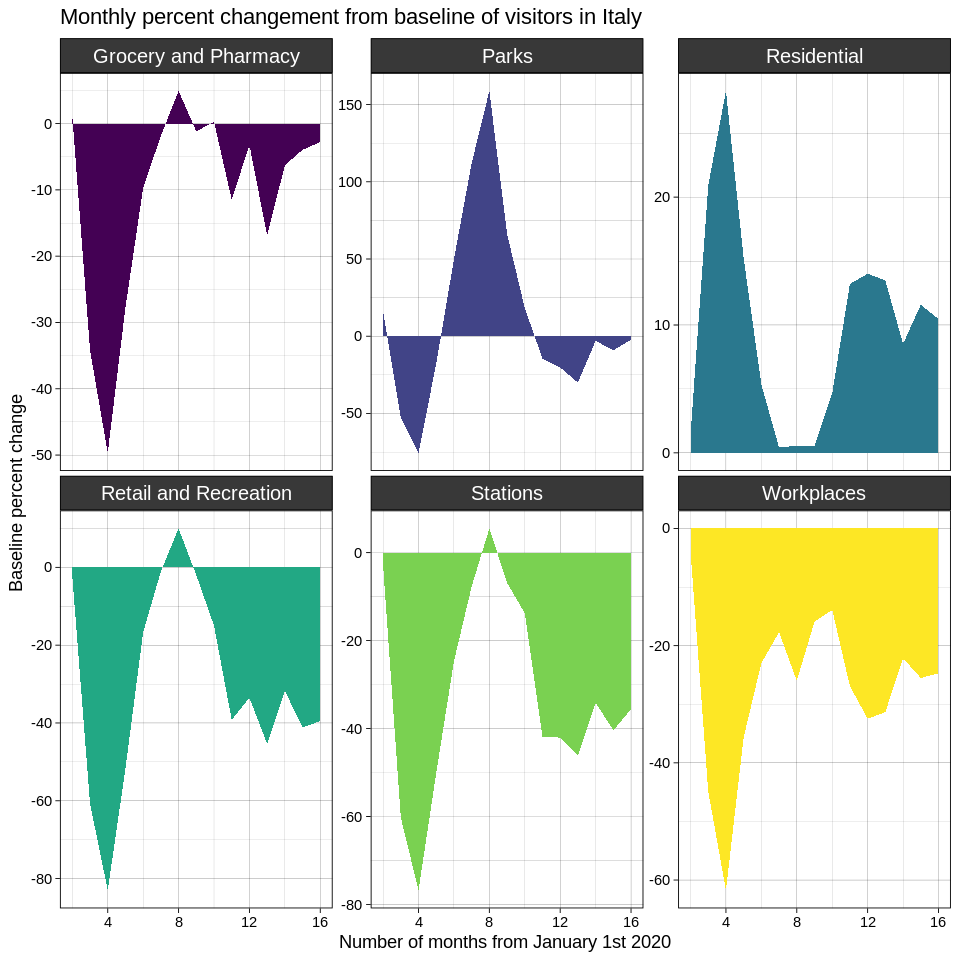

In [17]:
#groups over weeks and months. 
ITAdata<-ITAdata %>% 
            select(country_region,date,(retail_and_recreation_percent_change_from_baseline:residential_percent_change_from_baseline))%>%
            mutate(weeks=case_when(year(date)==2020 ~ week(date),
                                  year(date)==2021 ~ week(date)+53 ),
                  months=case_when(year(date)==2020 ~ month(date),
                                  year(date)==2021 ~ month(date)+12 ))

ITAdataw<-ITAdata %>%
            group_by(weeks) %>%
            summarise(across(ends_with("baseline"), ~mean(.x, na.rm = TRUE)) )

names(ITAdataw)=c("weeks", "Retail and Recreation", "Grocery and Pharmacy", "Parks", "Stations", "Workplaces", "Residential")


ITAdatam<-ITAdata %>%
            group_by(months) %>%
            summarise(across(ends_with("baseline"), ~mean(.x, na.rm = TRUE)) )

names(ITAdatam)=c("months", "Retail and Recreation", "Grocery and Pharmacy", "Parks", "Stations", "Workplaces", "Residential")




#plot week 
ITAdataw%>%gather("id", "value", 2:length(ITAdataw))%>%
    ggplot(.,aes(x=weeks,y=value,fill=id ))+
    geom_area() +
    scale_fill_viridis(discrete = TRUE) +
    #theme(legend.position="none") +
    labs(      # caption = "Note:The orange line is the start of phase 2,instead  the red lines includes the period between the start of phase 3 and wave 2. ",
                title="Weekly percent changement from baseline of visitors in Italy",
                x = "Number of week from January 1st 2020",
                 y = "Baseline percent change ") +
    theme_linedraw()+
    theme(
      legend.position="none",
      panel.spacing = unit(0.2, "lines"),
      strip.text.x = element_text(size = 12),
      strip.background =element_rect(fill="gray22")
    ) +
    facet_wrap(~id, scale="free_y")+
     geom_vline(xintercept = week( as.Date("2020-06-11")) ,linetype="dotted", color="red", size=1)+
     geom_vline(xintercept = week( as.Date("2020-10-8")) ,linetype="dotted", color="red", size=1)+
     geom_vline(xintercept = week( as.Date("2020-05-4")) ,linetype="dotted", color="darkorange1", size=1)+
     geom_vline(xintercept = week( as.Date("2021-03-5"))+53 ,linetype="dotted", color="chocolate", size=1)+
     geom_text(aes(x= week( as.Date("2020-06-11")), label="Phase3",y=min(value)+30), colour="black", angle=90, vjust = 1.2, hjust=0, size=3)+
     geom_text(aes(x= week( as.Date("2020-10-8")), label="Wave2",y=min(value)+30), colour="black", angle=90, vjust = 1.2, hjust=0, size=3)+
     geom_text(aes(x= week( as.Date("2020-05-4")), label="Phase2",y=min(value)+30), colour="black", angle=90, vjust = 1.2, hjust=0, size=3)+
     geom_text(aes(x= week( as.Date("2021-03-5"))+53, label="DPCM D.",y=min(value)+30), colour="black", angle=90, vjust = 1.2, hjust=0, size=3)
#up on I have selected some dates that wrap up the main restriction phases for italy



#plot months 

ITAdatam%>%gather("id", "value", 2:length(ITAdatam))%>%
    ggplot(.,aes(x=months,y=value,fill=id ))+
    geom_area() +
    scale_fill_viridis(discrete = TRUE) +
    theme(legend.position="none") +
    labs(       #caption = "Note: the red lines includes the period between the start of phase 3 and wave 2. ",
                title="Monthly percent changement from baseline of visitors in Italy",
                x = "Number of months from January 1st 2020",
                 y = "Baseline percent change ") +
    theme_linedraw()+
    theme(
      legend.position="none",
      panel.spacing = unit(0.2, "lines"),
      strip.text.x = element_text(size = 12),
      strip.background =element_rect(fill="gray22")
    ) +
    facet_wrap(~id, scale="free_y")



As one can see in the graph above, during the periods of major restrictions(for instance before Phase2 or after DPCM Draghi), people tends to stay in their house more often. We can also notice that the first restriction phase was harder than the others.

In [18]:
#here I buuild a function that redo all the procedures done for Italy for a generic country
analysis= function(df,name){ 

    #groups over weeks and months. 
    df<-df %>% 
                select(country_region,date,(retail_and_recreation_percent_change_from_baseline:residential_percent_change_from_baseline))%>%
                mutate(weeks=case_when(year(date)==2020 ~ week(date),
                                      year(date)==2021 ~ week(date)+53 ),
                      months=case_when(year(date)==2020 ~ month(date),
                                      year(date)==2021 ~ month(date)+12 ))

    dfw<-df %>%
                group_by(weeks) %>%
                summarise(across(ends_with("baseline"), ~mean(.x, na.rm = TRUE)) )

    names(dfw)=c("weeks", "Retail and Recreation", "Grocery and Pharmacy", "Parks", "Stations", "Workplaces", "Residential")


    dfm<-df %>%
                group_by(months) %>%
                summarise(across(ends_with("baseline"), ~mean(.x, na.rm = TRUE)) )

    names(dfm)=c("months", "Retail and Recreation", "Grocery and Pharmacy", "Parks", "Stations", "Workplaces", "Residential")







    #plot week 
    plotweek<-dfw%>%gather("id", "value", 2:length(dfw))%>%
        ggplot(.,aes(x=weeks,y=value,fill=id ))+
        geom_area() +
        scale_fill_viridis(discrete = TRUE) +
        #theme(legend.position="none") +
        labs(      # caption = "Note:The orange line is the start of phase 2,instead  the red lines includes the period between the start of phase 3 and wave 2. ",
                    title=paste("Weekly percent changement from baseline of visitors in ",name) ,
                    x = "Number of week from January 1st 2020",
                     y = "Baseline percent change ") +
        theme_linedraw()+
        theme(
          legend.position="none",
          panel.spacing = unit(0.2, "lines"),
          strip.text.x = element_text(size = 12),
          strip.background =element_rect(fill="gray22")
        ) +
        facet_wrap(~id, scale="free_y")
    
    
    print(plotweek)  
    
    #plot months
    plotm<-dfm%>%gather("id", "value", 2:length(dfm))%>%
        ggplot(.,aes(x=months,y=value,fill=id ))+
        geom_area() +
        scale_fill_viridis(discrete = TRUE) +
        theme(legend.position="none") +
        labs(       #caption = "Note: the red lines includes the period between the start of phase 3 and wave 2. ",
                    title=paste("Monthly percent changement from baseline of visitors in",name),
                    x = "Number of months from January 1st 2020",
                     y = "Baseline percent change ") +
        theme_linedraw()+
        theme(
          legend.position="none",
          panel.spacing = unit(0.2, "lines"),
          strip.text.x = element_text(size = 12),
          strip.background =element_rect(fill="gray22")
        ) +
        facet_wrap(~id, scale="free_y")
    
    print(plotm)
}


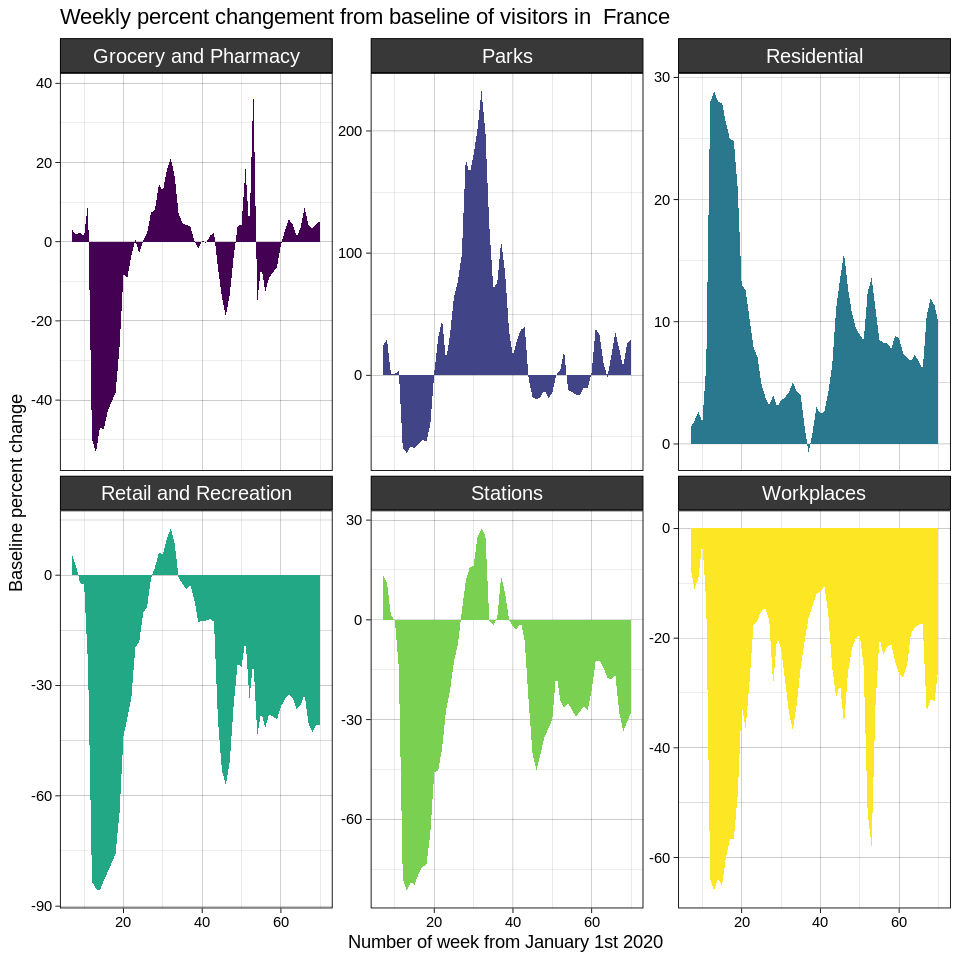

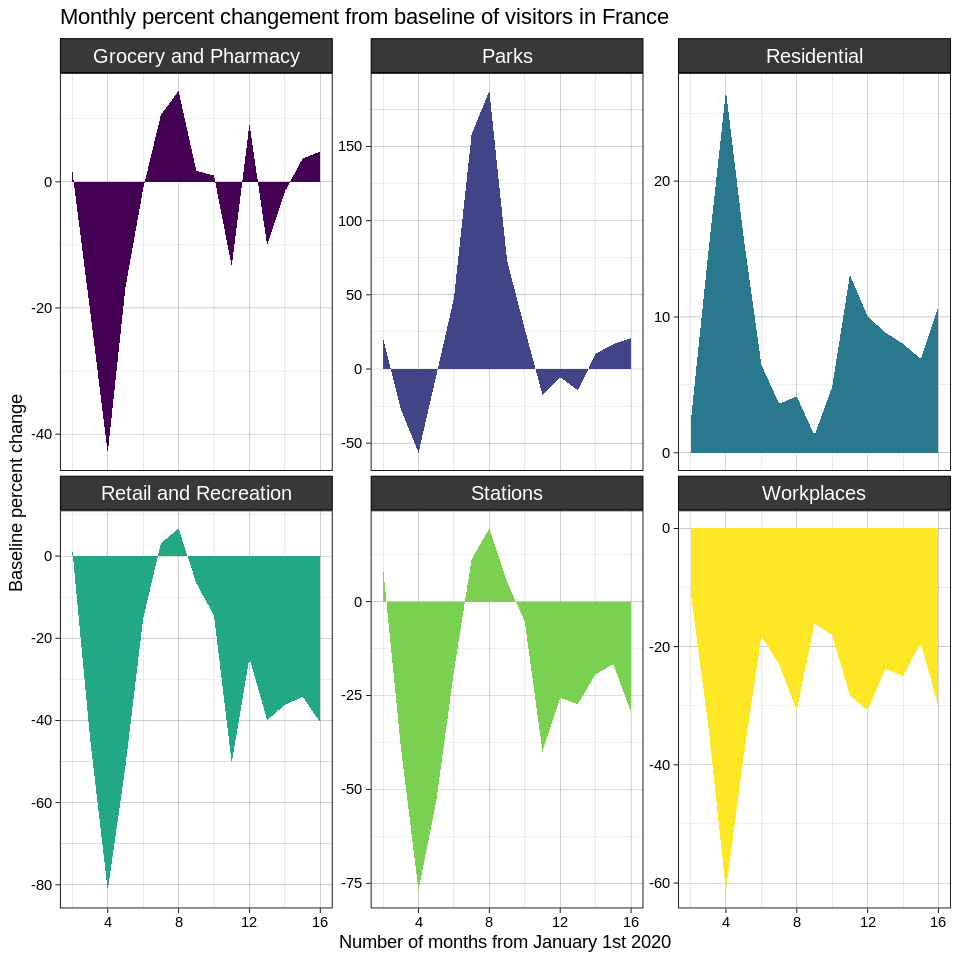

In [19]:
#plot Germany
analysis(FRAdata,"France")

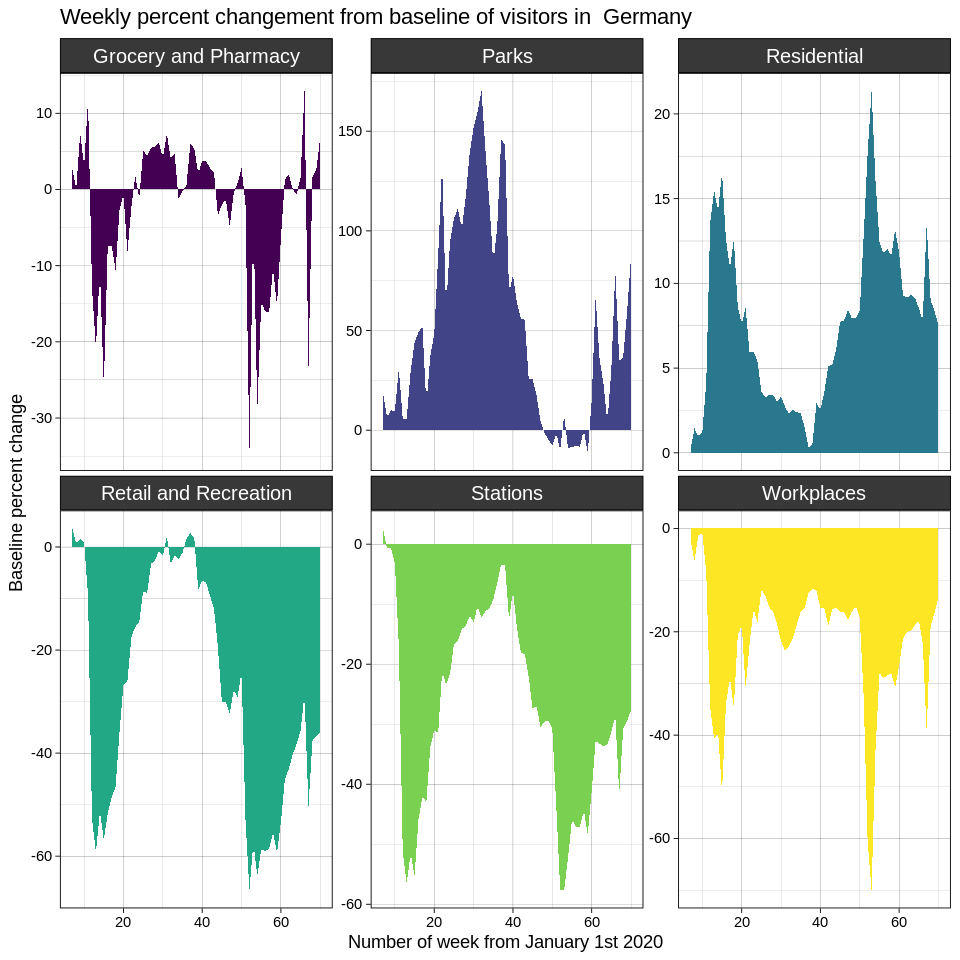

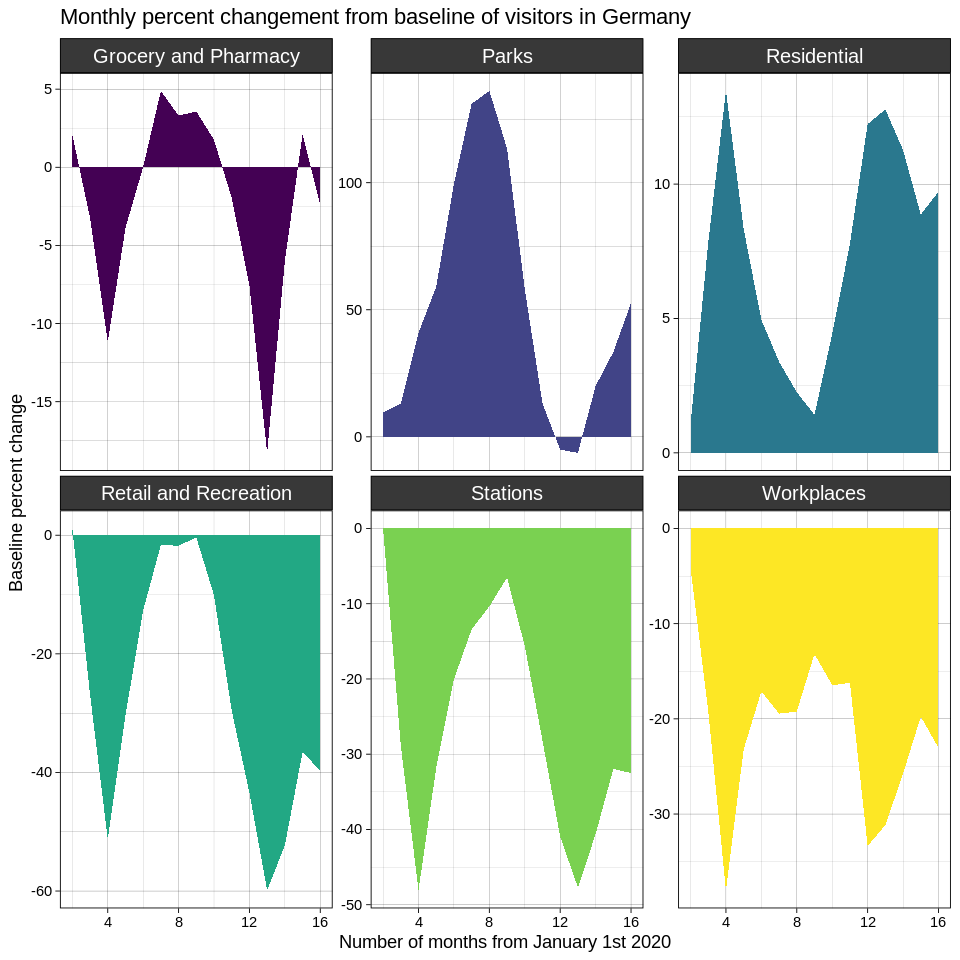

In [20]:
analysis(GERdata, "Germany")